In [246]:
import sqlite3
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import docstring
import seaborn as sns

In [247]:
conn = sqlite3.connect('C:/Users/DELL/Desktop/Internship/database.sqlite')

In [248]:
pd.read_sql("""SELECT *
               FROM sqlite_master
               WHERE type='table';""",
            conn)
            

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


In [252]:
#CHECKING THE HEAD
pd.read_sql("""SELECT *
               FROM Country
               limit 3;""",
            conn)



,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001


In [255]:
#CHECKING FOR NULL VALUES
pd.read_sql("""SELECT COUNT(*) - COUNT(IncomeGroup) AS missing_IncomeGroup,
               COUNT(*) - COUNT(TableName) AS missing_TableName
               FROM Country;""",
           conn)
            

,missing_IncomeGroup,missing_TableName
0,0,0


In [153]:
#CHECKING FOR DISTINCT INCOME GROUPS
pd.read_sql("""SELECT  DISTINCT IncomeGroup
               FROM Country;""",
            conn)
            

,IncomeGroup
0,Low income
1,Upper middle income
2,High income: nonOECD
3,
4,Lower middle income
5,High income: OECD


In [154]:
pd.read_sql("""SELECT  TableName,IncomeGroup
               
               FROM Country;""",
            conn)
            

,TableName,IncomeGroup
0,Afghanistan,Low income
1,Albania,Upper middle income
2,Algeria,Upper middle income
3,American Samoa,Upper middle income
4,Andorra,High income: nonOECD
5,Angola,Upper middle income
6,Antigua and Barbuda,High income: nonOECD
7,Arab World,
8,Argentina,High income: nonOECD
9,Armenia,Lower middle income


In [253]:
#FILTERING Countries HAVING LOW INCOME
pd.read_sql("""SELECT   TableName
               FROM Country
               WHERE IncomeGroup= 'Low income';""",
            conn)

,TableName
0,Afghanistan
1,Benin
2,Burkina Faso
3,Burundi
4,Cambodia
5,Central African Republic
6,Chad
7,Comoros
8,"Korea, Dem. Rep."
9,"Congo, Dem. Rep."


In [156]:
#FILTERING Countries HAVING Upper middle income

pd.read_sql("""SELECT   TableName
               FROM Country
               WHERE IncomeGroup= 'Upper middle income';""",
            conn)

,TableName
0,Albania
1,Algeria
2,American Samoa
3,Angola
4,Azerbaijan
5,Belarus
6,Belize
7,Bosnia and Herzegovina
8,Botswana
9,Brazil


In [157]:
#FILTERING Countries HAVING High income: nonOECD
pd.read_sql("""SELECT   TableName
               FROM Country
               WHERE IncomeGroup= 'High income: nonOECD';""",
            conn)

,TableName
0,Andorra
1,Antigua and Barbuda
2,Argentina
3,Aruba
4,Bahrain
5,Barbados
6,Bermuda
7,Brunei Darussalam
8,Cayman Islands
9,Channel Islands


In [158]:
#FILTERING Countries HAVING Lower middle income
pd.read_sql("""SELECT   TableName
               FROM Country
               WHERE IncomeGroup= 'Lower middle income';""",
            conn)

,TableName
0,Armenia
1,Bangladesh
2,Bhutan
3,Bolivia
4,Cabo Verde
5,Cameroon
6,"Congo, Rep."
7,Côte d'Ivoire
8,Djibouti
9,"Egypt, Arab Rep."


In [159]:
#FILTERING Countries HAVING High income: OECD
pd.read_sql("""SELECT   TableName
               FROM Country
               WHERE IncomeGroup= 'High income: OECD';""",
            conn)

,TableName
0,Australia
1,Austria
2,Belgium
3,Canada
4,Chile
5,Czech Republic
6,Denmark
7,Estonia
8,Finland
9,France


In [162]:
# CHECKING FOR MISSING VALUES IN CurrencyUnit COLUMN
pd.read_sql("""SELECT COUNT(*)
               FROM Country
               WHERE CurrencyUnit IS NULL;""",
           conn)

,COUNT(*)
0,0


In [166]:
#COUNTING HOW MANY C0UNTRIES CORRESPONDS TO DIFFERENT INCOME GROUPS
df=pd.read_sql("""SELECT IncomeGroup, COUNT(*) AS COUNT 
            FROM Country
            GROUP BY IncomeGroup ;""",
            conn)

In [167]:
df

,IncomeGroup,COUNT
0,,33
1,High income: OECD,32
2,High income: nonOECD,47
3,Low income,31
4,Lower middle income,51
5,Upper middle income,53


In [168]:
df.drop([0])

,IncomeGroup,COUNT
1,High income: OECD,32
2,High income: nonOECD,47
3,Low income,31
4,Lower middle income,51
5,Upper middle income,53


In [169]:
df1 = pd.DataFrame({'IncomeGroup': ['High_incomeOECD', 'High_incomenonOECD' ,'Low_income','Lower_middle_income', 'Upper_middle_income'],
                   'COUNT': [32, 47, 31,51,53]})
                  


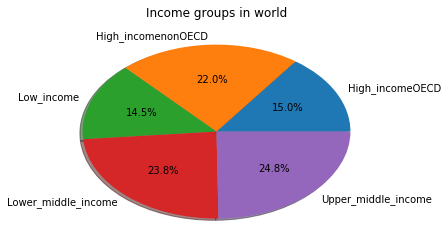

In [183]:
#PLOTTING A PIE CHART SHOWING THE DISTRIBUTION OF INCOMEGROUPS IN DIFFERENT COUNTRIES
my_data = [32, 47, 31,51,53]
my_labels = 'High_incomeOECD', 'High_incomenonOECD' ,'Low_income','Lower_middle_income', 'Upper_middle_income'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',shadow=True)
plt.title('Income groups in world')
plt.show()

In [184]:
#CHECKING THE HEAD
pd.read_sql("""SELECT *
               FROM Indicators
               LIMIT 3;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


In [185]:
#CHECKING FOR NULL VALUES
pd.read_sql("""SELECT COUNT(*)
               FROM Indicators
               WHERE IndicatorName IS NULL;""",
           conn)

,COUNT(*)
0,0


In [254]:
 #CHECKING FOR MISSING VALUES IN EACH COLUMN
pd.read_sql("""SELECT COUNT(*) - COUNT(CountryName) ,
                      COUNT(*) - COUNT(CountryCode) ,
                      COUNT(*) - COUNT(IndicatorName),
                      COUNT(*) - COUNT(IndicatorCode), 
                      COUNT(*) - COUNT(Year) , 
                      COUNT(*) - COUNT(Value) 
                FROM Indicators;""",
           conn)

,COUNT(*) - COUNT(CountryName),COUNT(*) - COUNT(CountryCode),COUNT(*) - COUNT(IndicatorName),COUNT(*) - COUNT(IndicatorCode),COUNT(*) - COUNT(Year),COUNT(*) - COUNT(Value)
0,0,0,0,0,0,0


In [196]:
#SELECTING INDICATRS WHICH ARE ABOUT THE WORD GDP
pd.read_sql("""SELECT DISTINCT IndicatorName
               FROM Indicators
               WHERE IndicatorName LIKE 'GDP%';""",
           conn)

,IndicatorName
0,GDP (constant LCU)
1,GDP (current LCU)
2,GDP at market prices (constant 2005 US$)
3,GDP at market prices (current US$)
4,GDP deflator (base year varies by country)
5,GDP growth (annual %)
6,GDP per capita (constant 2005 US$)
7,GDP per capita (constant LCU)
8,GDP per capita (current LCU)
9,GDP per capita (current US$)


In [217]:
#  GDP growth (annual %)' OF INDIA IN LAST YEARS
pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName ='GDP growth (annual %)'
                AND CountryName = "India"
                AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2010,10.259963
1,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2011,6.638353
2,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2012,5.081418
3,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013,6.899217
4,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,7.286253


In [222]:
# COMPARING WITH CHINA
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP growth (annual %)'
               AND (CountryName= 'India' OR CountryName= 'China')
               AND Year>=2010;""",
           conn)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2010,10.631708
1,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2010,10.259963
2,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2011,9.484506
3,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2011,6.638353
4,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2012,7.750298
5,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2012,5.081418
6,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013,7.683810
7,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013,6.899217
8,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,7.268461
9,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,7.286253


In [226]:
pd.read_sql("""SELECT DISTINCT CountryName
               FROM Indicators ;""",
               
            conn)

,CountryName
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
5,Angola
6,Antigua and Barbuda
7,Arab World
8,Argentina
9,Armenia


In [228]:
#COMPARING THREE CUNTRIES BETWEEN 2010 AND 2015
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP growth (annual %)'
               AND CountryName IN ("United Arab Emirates", "United States", "India")
               AND Year BETWEEN 2010 AND 2015;""",
            conn)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2010,10.259963
1,United Arab Emirates,ARE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2010,1.635449
2,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2010,2.531921
3,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2011,6.638353
4,United Arab Emirates,ARE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2011,5.207799
5,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2011,1.601455
6,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2012,5.081418
7,United Arab Emirates,ARE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2012,6.893596
8,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2012,2.321084
9,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013,6.899217


In [229]:
#FINDING HIGHEST GDP GROWTH IN 2014
pd.read_sql("""SELECT CountryName, MAX (Value)
               FROM Indicators
               WHERE IndicatorName = 'GDP growth (annual %)'
               AND Year = 2014;""",
            conn)

,CountryName,MAX (Value)
0,Turkmenistan,10.299983


In [230]:
# FINDING LOWEST GDP GROWTH IN 2014
pd.read_sql("""SELECT CountryName, MIN (Value)
               FROM Indicators
               WHERE IndicatorName = 'GDP growth (annual %)'
               AND Year = 2014;""",
            conn)

,CountryName,MIN (Value)
0,Libya,-24


In [231]:
#ORDERING BY GDP GROWTH
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP growth (annual %)'
               AND Year= 2014
               ORDER BY Value DESC
               LIMIT 5;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Turkmenistan,TKM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,10.299983
1,Ethiopia,ETH,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,10.279187
2,"Congo, Dem. Rep.",ZAR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,9.046596
3,Cote d'Ivoire,CIV,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,8.546468
4,Papua New Guinea,PNG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,8.533902


In [232]:
# COMPARING THE AVERAGES
pd.read_sql(""" SELECT CountryName, AVG(Value)
                FROM Indicators
                WHERE IndicatorName= 'GDP growth (annual %)'
                AND CountryName IN  ("United Arab Emirates", "United States", "India")
                AND Year>2010
                GROUP BY CountryName;""",
           conn)

,CountryName,AVG(Value)
0,India,6.476310
1,United Arab Emirates,5.248261
2,United States,2.132512


In [234]:
# MAKING A JOIN TO GET information about GDP GROWTH IN 2014 IN INDIA 
pd.read_sql(""" SELECT Indicators.*, Series.LongDefinition
                FROM Indicators
                LEFT JOIN Series 
                ON Indicators.IndicatorName  = Series.IndicatorName
                WHERE Indicators.IndicatorName ='GDP growth (annual %)'
                AND CountryName ='India'
                AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,LongDefinition
0,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,7.286253,Annual percentage growth rate of GDP at market...
